<a id="lib"></a>
# 1. Import Libraries

**Let us import the required libraries.**

In [18]:
# import 'pandas' 
import pandas as pd 

# import 'numpy' 
import numpy as np

# import subpackage of matplotlib
import matplotlib.pyplot as plt

# import 'seaborn'
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# import 'random' to generate random sample
import random

# import statistics to perform statistical computation  
import statistics

# import 'stats' package from scipy library
from scipy import stats

# import a library to perform Z-test
from statsmodels.stats import weightstats as stests

# to test the normality 
from scipy.stats import shapiro
from scipy.stats import chi2_contingency
# import the function to calculate the power of test
from statsmodels.stats import power

In [93]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

<a id="chisq"></a>
# 2. Chi-Square Test

It is a non-parametric test. `Non-parametric tests` do not require any assumptions on the parameter of the population from which the sample is taken. These tests can be applied to the ordinal/ nominal data. A non-parametric test can be performed on the data containing outliers.

The chi-square test statistic follows a Chi-square ($\chi^{2}$) distribution under the null hypothesis. It can be used to check the relationship between the categorical variables. 

Let us calculate the right-tailed $\chi^{2}$ values for different levels of significance ($\alpha$).

<a id="goodness"></a>
## 2.1 Chi-Square Test for Goodness of Fit

This test is used to compare the distribution of the categorical data with the expected distribution. 

<p style='text-indent:6em'> <strong> $H_{0}$: There is no significant difference between the observed and expected frequencies from the expected distribution</strong></p>
<p style='text-indent:6em'> <strong> $H_{1}$: There is a significant difference between the observed and expected frequencies from the expected distribution</strong></p>

### Example:



#### 1. At an emporium, the manager is interested in knowing the age group which visits the mall during the day. He defines categories as - children, teenagers, adults and senior citizens. He plans to have his inventory of goods accordingly. He claims that out of all the people who visited 5% are children, 38% are teenagers, 2% are senior citizens are remaining are adults. From a sample of 180 people, it was seen that 25 were children, 50 were teenagers, 90 were adults and  15 were senior citizens. Test the manager’s claim at a 95% confidence level.


In [48]:
# hypothesis
#h0: There is no significant difference between the observed and expected frequencies from the expected distribution
#ha: There is a significant difference between the observed and expected frequencies from the expected distribution


In [12]:
n=180
sig_lvl=0.05
exp_per=np.array([0.05,0.38,0.55,0.02])
exp_count=exp_per*n
obs_count=[25,50,90,15]
print(exp_count)
print(obs_count)

[ 9.  68.4 99.   3.6]
[25, 50, 90, 15]


In [13]:
# function 
stats, pval=stats.chisquare(f_exp=exp_count,f_obs=obs_count)
pval

3.659118590746896e-15

In [14]:
pval<sig_lvl
print('h0 is rejected \n There is a significant difference between the observed and expected frequencies from the expected distribution' )

h0 is rejected 
 There is a significant difference between the observed and expected frequencies from the expected distribution


In [19]:
exp_child=n*0.05
exp_teen=n*0.38
exp_sen= n*0.02
exp_adult= n*0.55


obs_child= 25
obs_teen= 50
obs_sen= 15
obs_adult= 90

In [20]:
chi=((obs_child-exp_child)**2/exp_child)+((obs_teen-exp_teen)**2/exp_teen)+((obs_sen-exp_sen)**2/exp_sen)+((obs_adult-exp_adult)**2/exp_adult)
chi

70.31233386496545

In [21]:
chi=np.floor(chi)
chi

70.0

In [22]:
stats.chisquare(f_exp=[exp_child,exp_teen,exp_sen,exp_adult],f_obs=[obs_child,obs_teen,obs_sen,obs_adult])

Power_divergenceResult(statistic=70.31233386496545, pvalue=3.659118590746868e-15)

### Practice:

1) In a school, sports teacher is willing to see the proportion of
people participating in different sports. He expects that all the sports
are equal in proportion. After the observation, he found that

cricket - 35%
volley ball - 25%
foot ball - 20%
basket ball - 20%

Total number of student in the school - 200

Check the hypotheis with 95% Confidence level.

In [67]:
n=200
sig_lvl=0.05
exp_per=np.array([0.35,0.25,0.20,0.20])
exp_count=exp_per*n
obs_count=[50,50,50,50]
print(exp_count)
print(obs_count)

[70. 50. 40. 40.]
[50, 50, 50, 50]


In [68]:
stats, pval =stats.chisquare(f_exp=exp_count,f_obs=obs_count)

In [69]:
pval

0.013375553908094653

<a id="ind"></a>
## 2.2 Chi-Square Test for Independence

This test is used to test whether the categorical variables are independent or not.

<p style='text-indent:20em'> <strong> $H_{0}$: The variables are independent</strong></p>
<p style='text-indent:20em'> <strong> $H_{1}$: The variables are not independent (i.e. variables are dependent)</strong></p>

Consider a categorical variable `A` with `r` levels and variable `B` with `c` levels. Let us test the independence of variables A and B.

The test statistic is given as:
<p style='text-indent:25em'> <strong> $\chi^{2} = \sum_{i= 1}^{r}\sum_{j = 1}^{c}\frac{O_{ij}^{2}}{E_{ij}} - N$</strong></p>

Where, <br>
$O_{ij}$: Observed frequency for category (i,j) <br>
$E_{ij}$: Expected frequency for category (i,j)<br>
$N$: Total number of observations

Under $H_{0}$, the test statistic follows a chi-square distribution with $(r-1)(c-1)$ degrees of freedom.

In [83]:
obs=pd.DataFrame([[30,10],[20,20]],columns=['yes','no'],index=['male','female'])
obs

,yes,no
male,30,10
female,20,20


In [96]:
stats.chi2_contingency(obs)

(4.32,
 0.03766692222862869,
 1,
 array([[25., 15.],
        [25., 15.]]))

#### For specific gender, the products manufactured by males and females fell in the following category - Perfect, Satisfactory and Defective.

Do these data provide sufficient evidence at 0.05 to infer that there are differences in the quality of the products manufactured by either genders.

               Perfect        Satisfactory       Defective
            
     Male         138               83                 64

     Female        64               67                 84

1. H0: The quality of products manufactured by females and males is same
2. H1: The quality of products manufactured by females and males is different
3. Level of significance - 0.05

In [98]:
observed=np.array([[138,83,64],[64,67,84]])
observed

array([[138,  83,  64],
       [ 64,  67,  84]])

In [103]:
stats.chi2_contingency(observed)

(22.152468645918482,
 1.547578021398957e-05,
 2,
 array([[115.14,  85.5 ,  84.36],
        [ 86.86,  64.5 ,  63.64]]))

### Example:

#### 1. Check if there is any relationship between the gender and education level of students with 95% confidence. 

Use the performance dataset of students available in the CSV file `students_data.csv`.

In [104]:
df = pd.read_csv('students_data.csv')
df.head()

,gender,ethnicity,education,lunch,test_prep_course,math_score,reading_score,writing_score,total_score,training_institute
0,female,group B,bachelor's degree,standard,none,89,55,56,200,Nature Learning
1,female,group C,college,standard,completed,55,63,72,190,Nature Learning
2,female,group B,master's degree,standard,none,64,71,56,191,Nature Learning
3,male,group A,associate's degree,free/reduced,none,60,99,72,231,Nature Learning
4,male,group C,college,standard,none,75,66,51,192,Nature Learning


In [105]:
# Ho : There is no relation b/w gender and education(Independent)
# Ha : There is a relation b/w gender and education(Dependent)

In [111]:
obs= pd.crosstab(index=df['gender'],columns=df['education'])
obs

education,Ph.D.,associate's degree,bachelor's degree,college,high school,master's degree
gender,,,,,,
female,91,116,63,117,94,36
male,88,106,55,108,103,23


In [112]:
stats.chi2_contingency(obs)

(3.5267538812534243,
 0.6193433487137843,
 5,
 array([[ 92.543, 114.774,  61.006, 116.325, 101.849,  30.503],
        [ 86.457, 107.226,  56.994, 108.675,  95.151,  28.497]]))

In [ ]:
# pval=0.61
# sig lvl= 0.05
# pval>sig lvl
# we are fail to reject h0
# There is no relation b/w gender and education(Independent)

###  Practice:

**Check the relation of gender and lunch with 95%CI.**

In [21]:
# Ho : There is no relation b/w gender and lunch (Independent)
# Ha : There is a relation b/w gender and lunch(Not independent)

In [113]:
obs= pd.crosstab(index=df['gender'],columns=df['lunch'])
obs

lunch,free/reduced,standard
gender,,
female,188,329
male,166,317


In [114]:
pval=stats.chi2_contingency(obs)
pval

(0.35177927582800844,
 0.5531076492252226,
 1,
 array([[183.018, 333.982],
        [170.982, 312.018]]))

In [ ]:
# pval=0.55
# sig lvl=0.05
# pval> sig lvl
# we are fail to reject h0
# There is no relation b/w gender and lunch

<a id="1way"></a>
## 3. One-way ANOVA

It is used to check the equality of population means for more than two independent samples. Each group is considered as a `treatment`. It assumes that the samples are taken from normally distributed populations. To check this assumption we can use the `Shapiro-Wilk Test.` Also, the population variances should be equal; this can be tested using the `Levene's Test`.

The null and alternative hypothesis is given as:
<p style='text-indent:20em'> <strong> $H_{0}$: The averages of all treatments are the same. </strong></p>
<p style='text-indent:20em'> <strong> $H_{1}$: At least one treatment has a different average. </strong></p>

Consider there are `t` treatments and `N` number of total observations. The test statistic is given as:
<p style='text-indent:28em'> <strong> $F = \frac{MTrSS}{MESS} $</strong></p>

Where,<br>
MTrSS = $\frac{TrSS}{df_{Tr}}$<br>

TrSS = $\sum_{i}^{t}\sum_{j}^{n_{i}}n_{i}(\bar{x_{i}}. - \bar{x}..)$<br> $n_{i}$ is the number of observations in $i^{th}$ treatment. <br>$\bar{x_{i}}.$ is the mean over $i^{th}$ treatment <br> $\bar{x}..$ is the grand mean (i.e. mean of all the observations). <br>

$df_{Tr}$ is the degrees of freedom for treatments (= $t-1$)

MESS = $\frac{ESS}{df_{e}}$<br>

ESS = $\sum_{i}^{t}\sum_{j}^{n_{i}}{(x_{ij} - \bar{x_{i}}.)}^{2}$

$df_{e}$ is the degrees of freedom for error (= $N-t$)

Under $H_{0}$, the test statistic follows F-distribution with ($t-1,  N-t$) degrees of freedom.

Let us calculate the F values for different levels of significance ($\alpha$).

In [134]:
s1=np.array([18,19,20])
s2=np.array([3,4,5])
s3=np.array([7,9,8])

In [135]:
# h0= all means are equal
# ha= atleast one means are not eual
# check 1st that 

In [136]:
# Assumption of anova
# 1. data must be normal
# 2. all variance must be equal

In [137]:
# 1. data should be normal
# shapiro test

In [138]:
# step1 check normality using shapiro test
print(stats.shapiro(s1))
print(stats.shapiro(s2))
print(stats.shapiro(s3))


ShapiroResult(statistic=1.0, pvalue=0.999998927116394)
ShapiroResult(statistic=1.0, pvalue=0.999998927116394)
ShapiroResult(statistic=1.0, pvalue=0.999998927116394)


In [139]:
# 2. all variances must be equal
# levene test
# h0: all variances must be equal
# ha: atleast one variance is not equal    


In [140]:
stats.levene(s1,s2,s3)

LeveneResult(statistic=0.0, pvalue=1.0)

In [141]:
# both assumption passed 
# we will proceed with anova 

In [142]:
# Anova assumption
# h0:all means are eual
# ha:atleast one mean is not equal

In [143]:
# Anova 
stats.f_oneway(s1,s2,s3)

F_onewayResult(statistic=181.0, pvalue=4.334213446206953e-06)

In [144]:
# pval=0
# sig lvl= 0.05
# pval<sig lvl
# reject h0
# atleast one mean is not equal

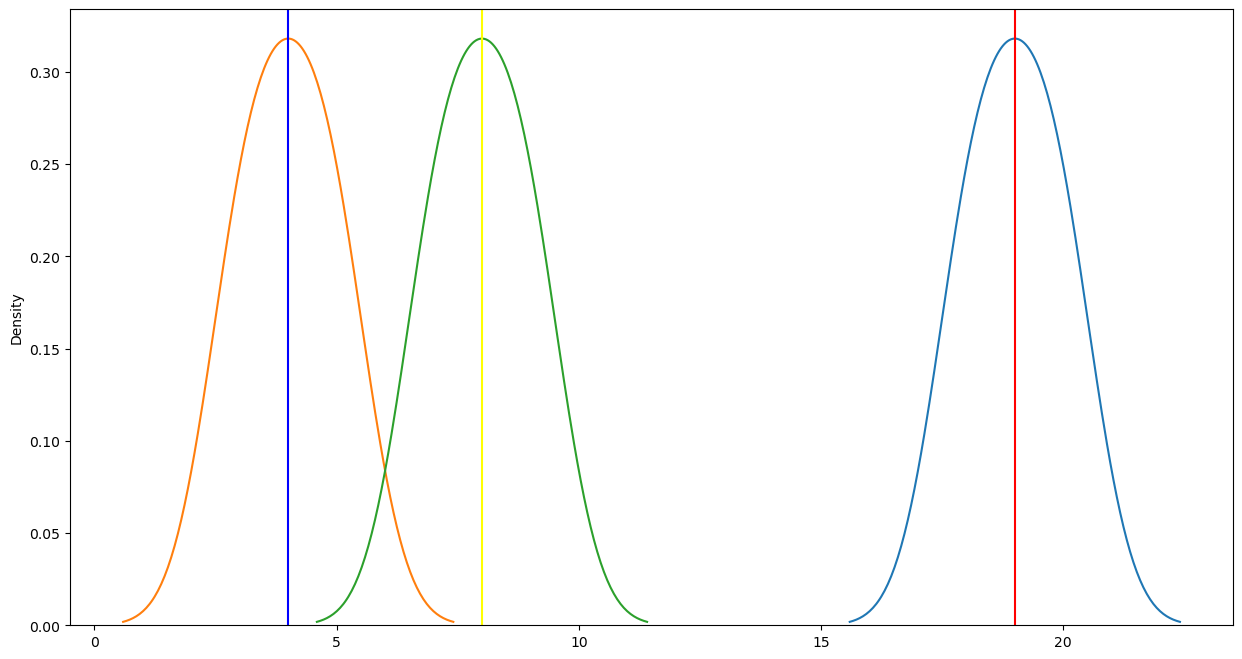

In [145]:
sns.distplot(s1,hist=False)
sns.distplot(s2,hist=False)
sns.distplot(s3,hist=False)
plt.axvline(s1.mean(),color='red')
plt.axvline(s2.mean(),color='blue')
plt.axvline(s3.mean(),color='yellow')
            

In [126]:
s1=np.array([1,4,7])
s2=np.array([3,4,5])
s3=np.array([5,6,7])

In [ ]:
# Assumption of anova
# 1. data must be normal
# 2. all variance must be equal

In [ ]:
# 1. data should be normal
# shapiro test

In [127]:
# step1 check normality using shapiro test
print(stats.shapiro(s1))
print(stats.shapiro(s2))
print(stats.shapiro(s3))

ShapiroResult(statistic=1.0, pvalue=0.999998927116394)
ShapiroResult(statistic=1.0, pvalue=0.999998927116394)
ShapiroResult(statistic=1.0, pvalue=0.999998927116394)


In [ ]:
# 2. all variances must be equal
# levene test
# h0: all variances must be equal
# ha: atleast one variance is not equal   

In [128]:
stats.levene(s1,s2,s3)

LeveneResult(statistic=1.4545454545454544, pvalue=0.30545945991891144)

In [ ]:
# both assumption passed 
# we will proceed with anova 

In [ ]:
# Anova assumption
# h0:all means are eual
# ha:atleast one mean is not equal

In [129]:
# Anova 
stats.f_oneway(s1,s2,s3)

F_onewayResult(statistic=1.090909090909091, pvalue=0.3943703703703705)

In [130]:
# pval=0.39
# sig lvl= 0.05
# pval>sig lvl
# we are fail to reject h0
# all means are equal

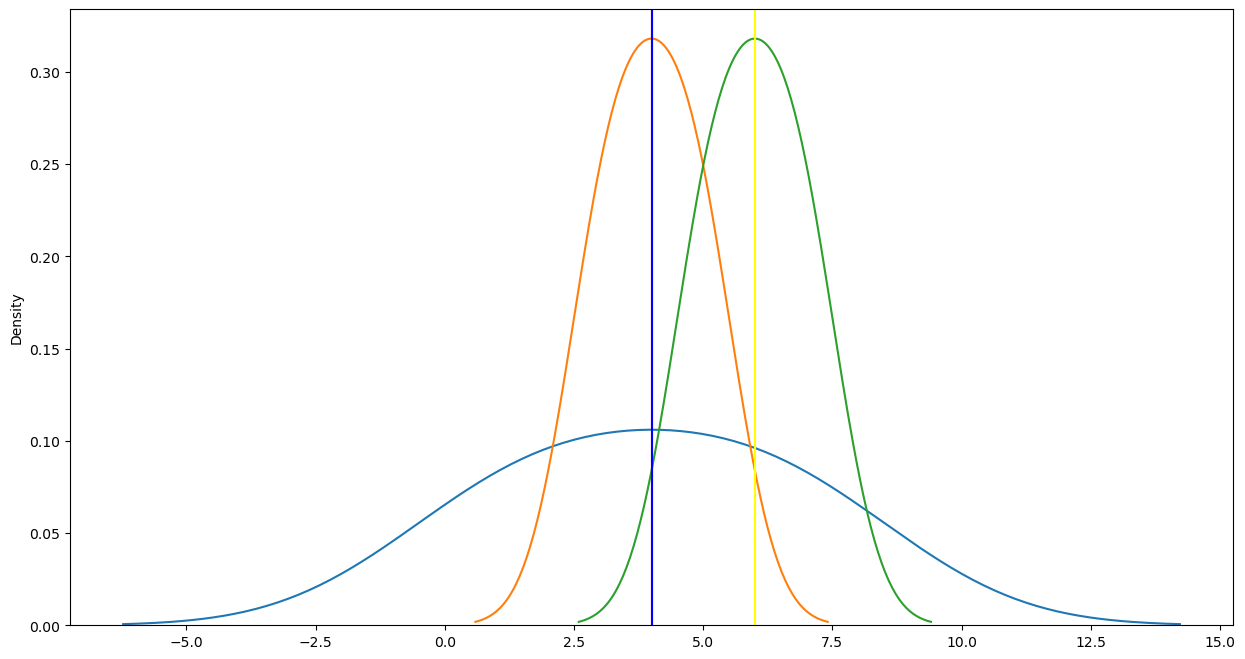

In [133]:
sns.distplot(s1,hist=False)
sns.distplot(s2,hist=False)
sns.distplot(s3,hist=False)
plt.axvline(s1.mean(),color='red')
plt.axvline(s2.mean(),color='blue')
plt.axvline(s3.mean(),color='yellow')
            

In [121]:
import statsmodels.stats.multicomp as mc

In [150]:
df = pd.DataFrame({'Salary': [18,19,20,3,4,5,7,9,8],
                   'Designation':['S1','S1','S1','S2','S2','S2','S3','S3','S3']})
df.head()

,Salary,Designation
0,18,S1
1,19,S1
2,20,S1
3,3,S2
4,4,S2


In [151]:
# when anova test failed
#  do post-hoc test
mc.pairwise_tukeyhsd(df['Salary'],df['Designation'],alpha=0.05).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
S1,S2,-15.0,0.0,-17.5052,-12.4948,True
S1,S3,-11.0,0.0,-13.5052,-8.4948,True
S2,S3,4.0,0.0065,1.4948,6.5052,True


In [152]:

df = pd.DataFrame({'Salary': [18,19,20,8,7,6,7,9,8],'Designation':['S1','S1','S1','S2','S2','S2','S3','S3','S3']})
df

,Salary,Designation
0,18,S1
1,19,S1
2,20,S1
3,8,S2
4,7,S2
5,6,S2
6,7,S3
7,9,S3
8,8,S3


In [153]:
mc.pairwise_tukeyhsd(df['Salary'],df['Designation'],alpha=0.05).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
S1,S2,-12.0,0.0,-14.5052,-9.4948,True
S1,S3,-11.0,0.0,-13.5052,-8.4948,True
S2,S3,1.0,0.4827,-1.5052,3.5052,False


### Example:

#### 1. Total marks in aptitude exam are recorded for students with different race/ethnicity. Test whether all the races/ethnicities have an equal average score with 0.05 level of significance. 

Use the performance dataset of students available in the CSV file `students_data.csv`.

In [154]:
# read the students performance data 
df = pd.read_csv('students_data.csv')
df.head()

,gender,ethnicity,education,lunch,test_prep_course,math_score,reading_score,writing_score,total_score,training_institute
0,female,group B,bachelor's degree,standard,none,89,55,56,200,Nature Learning
1,female,group C,college,standard,completed,55,63,72,190,Nature Learning
2,female,group B,master's degree,standard,none,64,71,56,191,Nature Learning
3,male,group A,associate's degree,free/reduced,none,60,99,72,231,Nature Learning
4,male,group C,college,standard,none,75,66,51,192,Nature Learning


In [1]:
df['ethnicity'].value_counts()

NameError: name 'df' is not defined

In [157]:
grp_a = df[df['ethnicity']=='group A']['total_score']
grp_b = df[df['ethnicity']=='group B']['total_score']
grp_c = df[df['ethnicity']=='group C']['total_score']
grp_d = df[df['ethnicity']=='group D']['total_score']
grp_e = df[df['ethnicity']=='group E']['total_score']

In [159]:
# Test of normality
print(shapiro(grp_a))
print(shapiro(grp_b))
print(shapiro(grp_c))
print(shapiro(grp_d))
print(shapiro(grp_e))

ShapiroResult(statistic=0.9894436001777649, pvalue=0.6901752352714539)
ShapiroResult(statistic=0.9947066307067871, pvalue=0.7402700185775757)
ShapiroResult(statistic=0.9973889589309692, pvalue=0.8947946429252625)
ShapiroResult(statistic=0.9948413968086243, pvalue=0.526653528213501)
ShapiroResult(statistic=0.9917189478874207, pvalue=0.5859626531600952)


In [ ]:
# pval>sig lvl
# all data are normal

In [160]:
stats.levene(grp_a,grp_b,grp_c,grp_d,grp_e)

LeveneResult(statistic=1.8006030590828939, pvalue=0.12649444001357793)

In [ ]:
# pval>sig lvl
# all the variance are equal

In [ ]:
# both assumption are passed

In [ ]:
#h0: all mean are equal
#ha: atleast one mean is not equal 

In [161]:
stats.f_oneway(grp_a,grp_b,grp_c,grp_d,grp_e)

F_onewayResult(statistic=0.789109595922189, pvalue=0.5322937031083035)

In [ ]:
# pval=0.53
# sig lvl=0.05
# pval>sig lvl
# h0 is selected
# all means are equal

#### 2. Ryan is a production manager at an industry manufacturing alloy seals. They have 4 machines - A, B, C and D. Ryan wants to study whether all the machines have equal efficiency. Ryan collects data of tensile strength from all the 4 machines as given. Test at 5% level of significance.

<img src='1_ANOVA.png'>

In [162]:
machine_a = [68.7,75.4,70.9,79.1,78.2]
machine_b = [62.7,68.5,63.1,62.2,60.3]
machine_c = [55.9,56.1,57.3,59.2,50.1]
machine_d = [80.7,70.3,80.9,85.4,82.3]

In [163]:
# Test of normality
print(shapiro(machine_a))
print(shapiro(machine_b))
print(shapiro(machine_c))
print(shapiro(machine_d))


ShapiroResult(statistic=0.9147658944129944, pvalue=0.49675315618515015)
ShapiroResult(statistic=0.8534733057022095, pvalue=0.2057488113641739)
ShapiroResult(statistic=0.8795408010482788, pvalue=0.307235449552536)
ShapiroResult(statistic=0.8367962837219238, pvalue=0.15625926852226257)


In [46]:
# pval>0.05
# All data are normal

In [47]:
# equality of variance
# Ho : all variance are equal
# Ha : atleast one variance is not equal



LeveneResult(statistic=0.3969333650936478, pvalue=0.7570021212992085)

In [164]:
stats.levene(machine_a,machine_b,machine_c,machine_d)

LeveneResult(statistic=0.3969333650936478, pvalue=0.7570021212992085)

In [ ]:
# pval>sig lvl
# all the variance are equal

In [165]:
# both assumption are passed

In [166]:
#h0: all mean are equal
#ha: atleast one mean is not equal 

In [167]:
stats.f_oneway(machine_a,machine_b,machine_c,machine_d)

F_onewayResult(statistic=32.03072350199285, pvalue=5.375613532781072e-07)

In [168]:
# pval=0.00
# sig lvl=0.05
# pval<sig lvl
# h0 is rejected
# all means are not equal

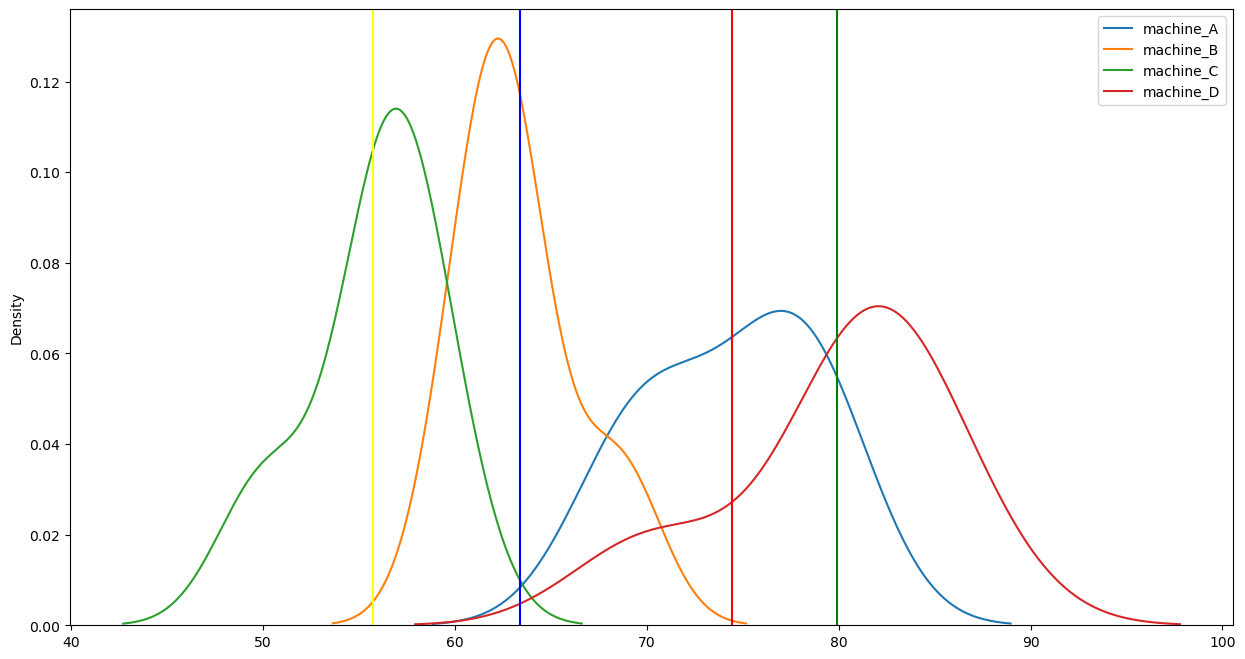

In [184]:
sns.distplot(machine_a,hist=False,label='machine_A')
sns.distplot(machine_b,hist=False,label='machine_B')
sns.distplot(machine_c,hist=False,label='machine_C')
sns.distplot(machine_d,hist=False,label='machine_D')
plt.axvline(pd.Series(machine_a).mean(),color='red')
plt.axvline(pd.Series(machine_b).mean(),color='blue')
plt.axvline(pd.Series(machine_c).mean(),color='yellow')
plt.axvline(pd.Series(machine_d).mean(),color='green')
plt.legend()
plt.show()

In [178]:
df=pd.DataFrame({'Machine':['A','A','A','A','A','B','B','B','B','B','C','C','C','C','C','D','D','D','D','D'],
                'Values': [68.7,75.4,70.9,79.1,78.2,62.7,68.5,63.1,62.2,60.3,55.9,56.1,57.3,59.2,50.1,80.7,70.3,80.9,85.4,82.3]})
df

,Machine,Values
0,A,68.7
1,A,75.4
2,A,70.9
3,A,79.1
4,A,78.2
5,B,62.7
6,B,68.5
7,B,63.1
8,B,62.2
9,B,60.3


In [174]:
mc.pairwise_tukeyhsd(df['Values'],df['Machine'],alpha=0.05).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
A,B,-11.1,0.0044,-18.8836,-3.3164,True
A,C,-18.74,0.0,-26.5236,-10.9564,True
A,D,5.46,0.2264,-2.3236,13.2436,False
B,C,-7.64,0.0553,-15.4236,0.1436,False
B,D,16.56,0.0001,8.7764,24.3436,True
C,D,24.2,0.0,16.4164,31.9836,True


In [ ]:
# means of A,D and means of B,C are range of similarity.

In [ ]:
sns.kdeplot()